In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
# import elo data as df
data_elo = pd.read_excel("./data/data_elo.xlsx")
data_elo
# indices = data_elo[data_elo["Land"] == "Türkei"].index

# print("Indices where 'Türkei' appears in the 'Land' column:", indices)
# row_219 = data_elo.iloc[219]
# row_219


,Land,R,Average #,Average R,1 Year Change #,1 Year Change R,Matches T,Matches H,Matches A,Matches N,Matches W,Matches L,Matches D,Goals F,Goals A
0,Afghanistan,1114,167,904,7,20,150,9,57,84,36,79,35,146,312
1,Albanien,1613,73,1499,15,74,383,181,176,26,105,197,81,363,577
2,Algerien,1666,51,1632,-5,-46,650,245,226,179,290,187,173,982,668
3,Andorra,1113,182,1047,3,-8,208,85,93,30,13,167,28,70,505
4,Angola,1508,88,1457,24,101,427,147,173,107,152,128,147,495,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Westsahara,996,189,996,-3,0,1,0,1,0,0,1,0,0,6
237,Jemen,1094,144,1212,5,2,274,53,81,140,59,165,50,265,561
238,Sambia,1485,60,1559,-6,-1,826,262,342,222,376,237,213,1319,869
239,Sansibar,1326,145,1108,-5,-2,204,27,42,135,37,126,41,169,434


In [3]:
# import market value data as df
data_market_value = pd.read_excel("./data/data_makret_value.xlsx")
data_market_value


# indices = data_market_value[data_market_value["Land"] == "Türkei"].index
# indices

# print("Indices where 'Türkei' appears in the 'Land' column:", indices)
# row_219 = data_elo.iloc[219]
# row_219

,#,Land,Confederation,Market Value
0,1,England,UEFA,€1.47bn
1,2,Frankreich,UEFA,€1.21bn
2,3,Portugal,UEFA,€1.06bn
3,4,Spanien,UEFA,€906.00m
4,5,Italien,UEFA,€757.00m
5,6,Deutschland,UEFA,€672.00m
6,7,Niederlande,UEFA,€610.00m
7,8,Belgien,UEFA,€540.80m
8,9,Norwegen,UEFA,€474.20m
9,10,Dänemark,UEFA,€368.50m


In [4]:
# import team list from the european chamipionship 2024

data_teams = pd.read_excel("./data/em_teams.xlsx")
data_teams


,Land,Gruppe
0,Deutschland,A
1,Schottland,A
2,Ungarn,A
3,Schweiz,A
4,Spanien,B
5,Kroatien,B
6,Italien,B
7,Albanien,B
8,Slowenien,C
9,Dänemark,C


In [5]:
merge_data = pd.merge(data_teams, data_elo, on="Land")
merge_data = pd.merge(merge_data,data_market_value,on="Land" )
merge_data

,Land,Gruppe,R,Average #,Average R,1 Year Change #,1 Year Change R,Matches T,Matches H,Matches A,Matches N,Matches W,Matches L,Matches D,Goals F,Goals A,#,Confederation,Market Value
0,Deutschland,A,1921,8,1910,-3,-30,1019,451,407,161,587,220,212,2286,1207,6,UEFA,€672.00m
1,Schottland,A,1776,14,1878,0,-22,843,392,404,47,401,258,184,1456,1041,16,UEFA,€239.40m
2,Ungarn,A,1842,20,1836,3,11,1013,456,485,72,482,315,216,2061,1492,23,UEFA,€166.65m
3,Schweiz,A,1804,27,1686,-7,-87,869,414,382,73,308,368,193,1286,1453,18,UEFA,€223.20m
4,Spanien,B,2019,7,1942,4,56,753,329,294,130,440,138,175,1517,675,4,UEFA,€906.00m
5,Kroatien,B,1953,12,1879,-3,-4,375,147,159,69,196,78,101,647,376,14,UEFA,€286.00m
6,Italien,B,1956,8,1916,0,6,878,396,317,165,467,171,240,1536,863,5,UEFA,€757.00m
7,Albanien,B,1613,73,1499,15,74,383,181,176,26,105,197,81,363,577,30,UEFA,€123.05m
8,Slowenien,C,1739,55,1619,12,61,292,132,134,26,108,111,73,370,344,27,UEFA,€130.85m
9,Dänemark,C,1822,20,1798,-2,-32,879,400,388,91,409,292,178,1612,1190,10,UEFA,€368.50m


In [6]:
def win_possiblility(data, country_a, country_b):
    rating_a = data.loc[data["Land"] == country_a, "R"].values[0]
    rating_b = data.loc[data["Land"] == country_b, "R"].values[0]

    dr = rating_a - rating_b
    we = 1 / (10 ** (-dr / 400) + 1)

    return we

# test = win_possiblility(merge_data, "Schweiz", "Deutschland")
test = win_possiblility(merge_data, "Deutschland", "Türkei")
test



0.7279715135441962

In [7]:
def simulate_game(data, team_a = str, team_b = str):

    win_pos_a = win_possiblility(data, team_a, team_b)
    if np.random.random() <= win_pos_a:
        win_team = team_a
    else:
        win_team = team_b

    return win_team


test = simulate_game(merge_data, "Schweiz", "Deutschland")
test

'Deutschland'

In [8]:
def simulate_group(data, group=str):
    filtered_df = data_teams[data_teams['Gruppe'] == group]

    teams = filtered_df["Land"].tolist()
    win_counts = {team: 0 for team in teams}

    group_games = [
        simulate_game(data, team1, team2) for team1, team2 in combinations(teams, 2)
    ]

    for winner in group_games:
        win_counts[winner] += 1

    sorted_teams = sorted(win_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_teams_names = [team[0] for team in sorted_teams]

    return sorted_teams_names

test = simulate_group(merge_data, "E")
print(test)

['Belgien', 'Rumänien', 'Slowakei', 'Ukraine']


In [12]:
def octa_round(data):
    #Get every group
    group_a = simulate_group(data, "A")
    group_b = simulate_group(data, "B")
    group_c = simulate_group(data, "C")
    group_d = simulate_group(data, "D")
    group_e = simulate_group(data, "E")
    group_f = simulate_group(data, "F")

    #Get 3 extra teams (3rd place)
    wildcard1 = np.random.choice([group_a[2], group_d[2], group_e[2], group_f[2]])
    wildcard2 = np.random.choice([group_a[2], group_b[2], group_c[2]])
    wildcard3 = np.random.choice([group_a[2], group_b[2], group_c[2], group_d[2]])
    wildcard4 = np.random.choice([group_d[2], group_e[2], group_f[2]])

    octa_final_1 = simulate_game(data, group_b[0], wildcard1)
    octa_final_2 = simulate_game(data, group_a[0], group_c[1])
    octa_final_3 = simulate_game(data, group_f[0], wildcard2)
    octa_final_4 = simulate_game(data, group_d[1], group_e[1])
    octa_final_5 = simulate_game(data, group_e[0], wildcard3)
    octa_final_6 = simulate_game(data, group_d[0], group_f[1])
    octa_final_7 = simulate_game(data, group_c[0], wildcard4)
    octa_final_8 = simulate_game(data, group_a[1], group_b[1])

    octa_finals = [octa_final_1, octa_final_2, octa_final_3, octa_final_4, octa_final_5, octa_final_6, octa_final_7, octa_final_8]

    return octa_finals



test = octa_round(merge_data)
print(test)

['Italien', 'Deutschland', 'Portugal', 'Niederlande', 'Belgien', 'Frankreich', 'England', 'Kroatien']


In [13]:
def quater_round(data, octa_finals):
    quater_final_1 = simulate_game(data, octa_finals[0], octa_finals[1])
    quater_final_2 = simulate_game(data, octa_finals[2], octa_finals[3])
    quater_final_3 = simulate_game(data, octa_finals[4], octa_finals[5])
    quater_final_4 = simulate_game(data, octa_finals[6], octa_finals[7])

    quater_finals = [quater_final_1, quater_final_2, quater_final_3, quater_final_4]

    return quater_finals

test_quater = quater_round(merge_data, test)
print(test_quater)

['Deutschland', 'Portugal', 'Frankreich', 'Kroatien']


In [14]:
def half_round(data, quater_finals):
    half_final_1 = simulate_game(data, quater_finals[0], quater_finals[1])
    half_final_2 = simulate_game(data, quater_finals[2], quater_finals[3])

    half_finals = [half_final_1, half_final_2]

    return half_finals

test_half = half_round(merge_data, test_quater)
print(test_half)

['Portugal', 'Frankreich']


In [15]:
def final_round(data, half_finals):
    final = simulate_game(data, half_finals[0], half_finals[1])

    return final

test_final = final_round(merge_data, test_half)
print(test_final)

Frankreich


In [16]:
def simulate_tournament(data):
    octa_finals = octa_round(data)
    quater_finals = quater_round(data, octa_finals)
    half_finals = half_round(data, quater_finals)
    final = final_round(data, half_finals)

    return final

test_tournament = simulate_tournament(merge_data)


In [17]:
def multiple_simulations(data, n):
    winner_dict = {}

    for i in range(n):
        winner = simulate_tournament(data)
        print(i)

        if winner not in winner_dict:
            winner_dict[winner] = 1
        else:
            winner_dict[winner] += 1
        
    return winner_dict

In [21]:
n = 1000
lst = multiple_simulations(merge_data, n)
print(lst)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

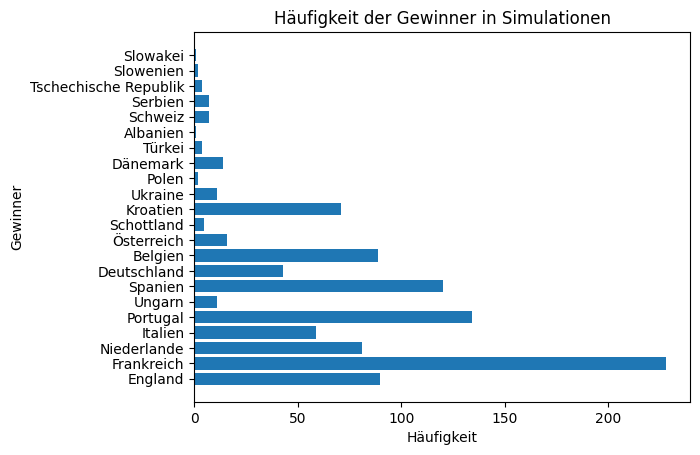

In [22]:
plt.barh(list(lst.keys()), lst.values())  # Horizontaler Balkendiagramm
plt.xlabel('Häufigkeit')
plt.ylabel('Gewinner')
plt.title('Häufigkeit der Gewinner in Simulationen')
plt.show()

In [25]:
print("Chance das die Schweiz die EM gewinnt liegt bei:", lst["Schweiz"]/n, "%")
print("Anzahl der Simulationen:", n)

Chance das die Schweiz die EM gewinnt liegt bei: 0.007 %
Anzahl der Simulationen: 1000


In [ ]:
# def ko_quali_list(group_rangking, groups = ["A", "B", "C", "D", "E", "F"]):
#     winner = []

#     for group in groups:
#         if 


#def ko_simulation():
      
 
    
  
# def ko_winners():

    

# def final_simulation():
    

# def simulation(data, repetitions):


In [ ]:
# TO DO:
# - create all functions
# - make this file a heler file
# - run the simulation in a new file called simulation
# - calc the possibility that Switzerland wins the EC